# About Dataset

Order ID: A unique identifier for each order.
Product: The name of the product sold.
Quantity Ordered: The quantity of the product ordered in each order.
Price Each: The price of each unit of the product.
Order Date: The date on which the order was placed.
Purchase Address: The address where the order was shipped.
The data covers the period from January 2019 to December 2020 and includes over 180,000 rows. This dataset can be used for various types of analysis, such as identifying top-selling products, analyzing sales trends over time, and identifying patterns in customer behavior. It's a great dataset for practicing data cleaning, data preparation, and data visualization techniques.

# load dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("sales_dataset.csv")

C:\Users\HP\AppData\Local\Temp\ipykernel_19408\1389471601.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("sales_dataset.csv")


Because of this upper error I changed my read code as below. There are two way that "set low_memory=False"- it hide error and another way is convert mixed data type into the specific data type because this warning says that column (0) has mixed data type.

In [4]:
df=pd.read_csv("sales_dataset.csv",low_memory=False)

In [5]:
df.head()

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
0,100354678,2020-10-01,received,574772.0,oasis_Oasis-064-36,21.0,89.9,1798.0,0.0,1798.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
1,100354678,2020-10-01,received,574774.0,Fantastic_FT-48,11.0,19.0,190.0,0.0,190.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
2,100354680,2020-10-01,complete,574777.0,mdeal_DMC-610-8,9.0,149.9,1199.2,0.0,1199.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
3,100354680,2020-10-01,complete,574779.0,oasis_Oasis-061-36,9.0,79.9,639.2,0.0,639.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
4,100367357,2020-11-13,received,595185.0,MEFNAR59C38B6CA08CD,2.0,99.9,99.9,0.0,99.9,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0


# EDA

checking information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          286392 non-null  object 
 1   order_date        286392 non-null  object 
 2   status            286392 non-null  object 
 3   item_id           286392 non-null  float64
 4   sku               286392 non-null  object 
 5   qty_ordered       286392 non-null  float64
 6   price             286392 non-null  float64
 7   value             286392 non-null  float64
 8   discount_amount   286392 non-null  float64
 9   total             286392 non-null  float64
 10  category          286392 non-null  object 
 11  payment_method    286392 non-null  object 
 12  bi_st             286392 non-null  object 
 13  cust_id           286392 non-null  float64
 14  year              286392 non-null  int64  
 15  month             286392 non-null  object 
 16  ref_num           28

in this dataset there were many datatypes are wrong. So We have to change it.

In [7]:
df['order_id']=df['order_id'].astype('int')

ValueError: invalid literal for int() with base 10: '100468520-1'

It is showing me error because because Python's int() function is trying to convert the string '100468520-1' into an integer, but it contains a hyphen (-), which makes it an invalid integer format. So I am using pd.to_numeric function.

In [8]:
df['order_id']=pd.to_numeric(df['order_id'],errors='coerce')

In [9]:
df['order_date']=pd.to_datetime(df['order_date'],errors='coerce')

The item_id and cust_id columns are float, which may need conversion to integers.

In [10]:
df['item_id']=df['item_id'].astype('int64')

In [11]:
df['cust_id']=df['cust_id'].astype('int64')

There are customer details like Name, Age, Email and SSN (which should be removed for privacy).

In [15]:
drop_columns = ['SSN', 'E Mail', 'User Name']
df.drop(labels=drop_columns, axis=1, inplace=True) 

Here full_name is given so there is no need to take extra column as Last Name,First Name,Middle Initial

In [17]:
drop_columns = ['Last Name', 'First Name', 'Middle Initial']
df.drop(labels=drop_columns, axis=1, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_id          286387 non-null  float64       
 1   order_date        286392 non-null  datetime64[ns]
 2   status            286392 non-null  object        
 3   item_id           286392 non-null  int64         
 4   sku               286392 non-null  object        
 5   qty_ordered       286392 non-null  float64       
 6   price             286392 non-null  float64       
 7   value             286392 non-null  float64       
 8   discount_amount   286392 non-null  float64       
 9   total             286392 non-null  float64       
 10  category          286392 non-null  object        
 11  payment_method    286392 non-null  object        
 12  bi_st             286392 non-null  object        
 13  cust_id           286392 non-null  int64         
 14  year

# checking null values

In [19]:
df.isnull().sum()

order_id            5
order_date          0
status              0
item_id             0
sku                 0
qty_ordered         0
price               0
value               0
discount_amount     0
total               0
category            0
payment_method      0
bi_st               0
cust_id             0
year                0
month               0
ref_num             0
Name Prefix         0
Gender              0
age                 0
full_name           0
Customer Since      0
Phone No.           0
Place Name          0
County              0
City                0
State               0
Zip                 0
Region              0
Discount_Percent    0
dtype: int64

# Descriptive statistics

Total sales

In [20]:
Total_sales=df['total'].sum()

In [21]:
Total_sales

233650194.43208995

Average value of order

In [24]:
Avrj_value=df['total'].mean()

In [25]:
Avrj_value

815.8405068301138

#Sales by category

In [27]:
sales_cate=df.groupby('category')['total'].sum()

In [28]:
sales_cate

category
Appliances            3.006084e+07
Beauty & Grooming     2.644748e+06
Books                 3.241695e+04
Computing             9.362343e+06
Entertainment         2.713843e+07
Health & Sports       1.019958e+06
Home & Living         1.810582e+06
Kids & Baby           8.562133e+05
Men's Fashion         4.820147e+06
Mobiles & Tablets     1.301120e+08
Others                1.556433e+07
School & Education    1.147401e+05
Soghaat               5.766999e+05
Superstore            2.886907e+06
Women's Fashion       6.649842e+06
Name: total, dtype: float64

# checking correlation

In [31]:
df.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_19408\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,order_id,item_id,qty_ordered,price,value,discount_amount,total,cust_id,year,ref_num,age,Zip,Discount_Percent
order_id,1.000000,0.998558,0.101545,0.073594,0.077974,-0.076094,0.091354,0.411058,0.825466,0.009349,-0.006903,-0.007936,-0.132624
item_id,0.998558,1.000000,0.103074,0.072898,0.078383,-0.073722,0.091474,0.413622,0.843113,0.008687,-0.006897,-0.007635,-0.133427
qty_ordered,0.101545,0.103074,1.000000,-0.103748,0.005123,0.021244,0.002603,-0.012639,0.119646,0.011227,0.000552,0.005192,0.073697
price,0.073594,0.072898,-0.103748,1.000000,0.767113,0.241494,0.770518,0.107743,0.019229,-0.001493,-0.007935,-0.000976,0.053462
value,0.077974,0.078383,0.005123,0.767113,1.000000,0.403482,0.992955,0.115429,0.039287,-0.006652,-0.002973,-0.003190,0.077948
discount_amount,-0.076094,-0.073722,0.021244,0.241494,0.403482,1.000000,0.292218,-0.020460,-0.092108,-0.005109,0.000782,0.002785,0.426131
total,0.091354,0.091474,0.002603,0.770518,0.992955,0.292218,1.000000,0.123297,0.052991,-0.006291,-0.003209,-0.003695,0.026287
cust_id,0.411058,0.413622,-0.012639,0.107743,0.115429,-0.020460,0.123297,1.000000,0.352969,-0.016442,-0.006795,-0.001935,-0.153045
year,0.825466,0.843113,0.119646,0.019229,0.039287,-0.092108,0.052991,0.352969,1.000000,0.000865,0.000048,-0.000731,-0.181190
ref_num,0.009349,0.008687,0.011227,-0.001493,-0.006652,-0.005109,-0.006291,-0.016442,0.000865,1.000000,-0.012898,-0.016433,-0.002294


C:\Users\HP\AppData\Local\Temp\ipykernel_19408\2502944394.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='rainbow')


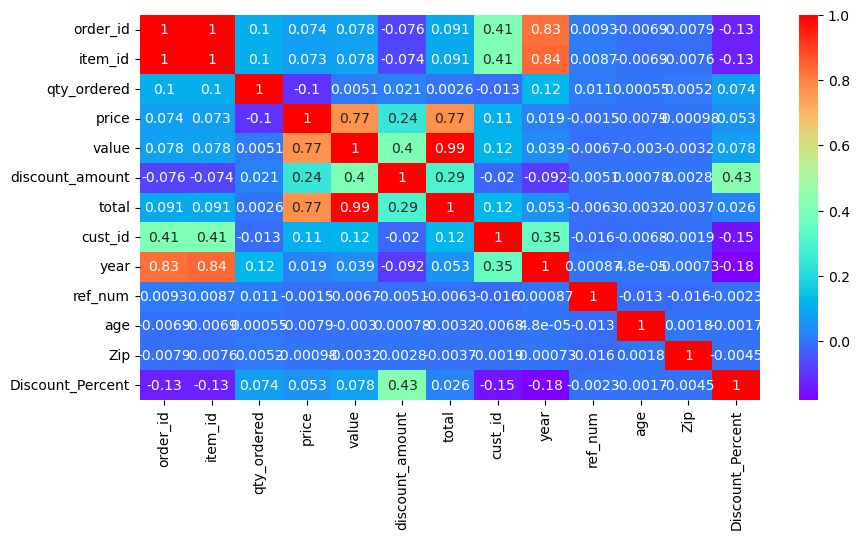

In [33]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='rainbow')
plt.show()

There were no any column is highly correlated because value of target column with respect to other column is less than 0.5 or 0.6

# Visualization

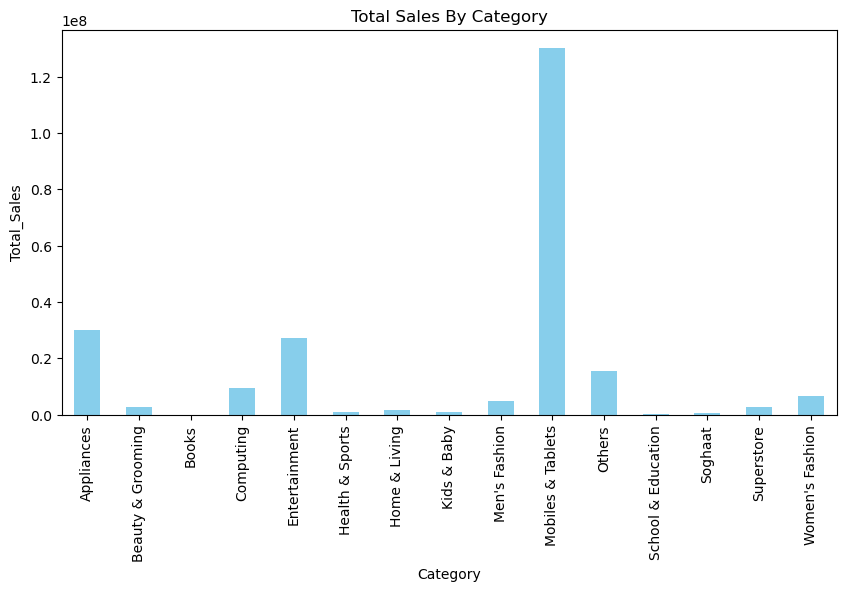

In [46]:
plt.figure(figsize=(10,5))
sales_cate.plot(kind='bar',color='skyblue')
plt.title("Total Sales By Category")
plt.xlabel("Category")
plt.ylabel("Total_Sales")
plt.xticks(rotation=90)
plt.show()

# Payment Method Distribution

Firstly we calculate the payment method's value count

In [37]:
Pmnt_mthd_cunt=df['payment_method'].value_counts()

In [38]:
Pmnt_mthd_cunt

cod                  102916
Easypay               69679
Payaxis               31049
easypay_voucher       29763
bankalfalah           23057
Easypay_MA            11536
jazzwallet             6669
jazzvoucher            6045
customercredit         3702
apg                    1758
mcblite                 208
cashatdoorstep            9
financesettlement         1
Name: payment_method, dtype: int64

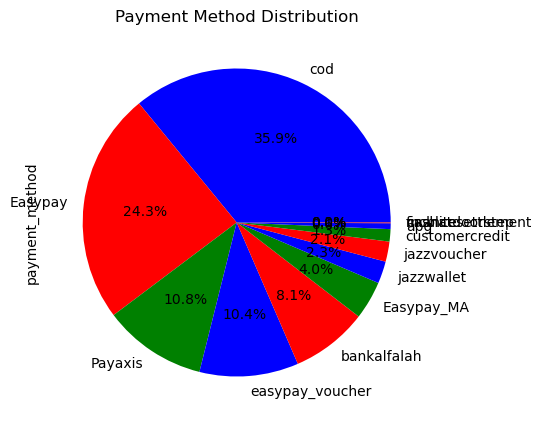

In [45]:
plt.figure(figsize=(10,5))
Pmnt_mthd_cunt.plot.pie(autopct='%2.1f%%',colors=['blue','red','green'])
plt.title("Payment Method Distribution")
plt.show()

# Conclusion-

Based on the analysis of sales by category, we can draw the following insights:

 (1)Best-Selling Category: "Mobiles and Tablets"
 Highest sales indicate that customers prefer purchasing mobile phones, tablets, and related accessories frequently.
 This could be due to high demand for technology, frequent upgrades, and new product launches.
 The business should focus on stock availability, exclusive deals, and competitive pricing to maintain leadership in this category.

 (2)Least-Selling Categories: "Books" and "School and Education"
 Lowest sales suggest that customers are not actively purchasing books or educational materials from this platform.
 Possible reasons could be:

Customers prefer physical bookstores or other specialized platforms.
Lack of promotions or discounts on educational products.
Digital learning trends reducing the need for physical books.

#####Improvement Strategies:

Offer discounts or bundle deals on books and educational materials.
Promote online learning kits (e-books, study materials, and online courses).
Collaborate with schools/universities to provide bulk purchases or subscriptions.

Based on the Payment Method Distribution Pie Chart, we can derive the following insights:

(1) Most Preferred Payment Method: "Cash on Delivery (COD)"
 The majority of customers prefer COD over other payment options.
 This suggests that customers trust paying after receiving the product, possibly due to concerns about online fraud or product quality.
 To optimize finances and reduce handling costs, the business can:

Offer discounts or cashback on prepaid orders.
Improve the return policy and product quality assurance to build trust in online payments.
(2) Least Preferred Payment Method: "Cash at Doorstep"
 Fewer customers choose Cash at Doorstep, which might indicate:

Limited awareness of this payment method.
Customers finding it inconvenient or having alternative digital payment preferences.
Logistical or operational inefficiencies in handling doorstep cash transactions.
 Suggested Improvements:

Educate customers about the benefits of Cash at Doorstep (if it's different from COD).
Streamline the process to make it as convenient as other payment options.
Offer small incentives (discounts or rewards) for choosing this method.